# Упражнения: Set 1

## Подготовка данных

### Задание 1.1

Постройте CountVectorizer самостоятельно для предложений ниже. Затем импортируйте CountVectorizer из sklearn и сравните результаты.

**Мой CountVectorizer**

In [1]:
import re

In [2]:
corpus = ['Короткий осенний день клонится к вечеру. ',
          'Точно в полусне прошел весь остальной день',
          'Весь остаток дня был сплошным торжеством']

In [3]:
unique_ = set()

for row in corpus:
    row = row.lower()
    words_only = re.findall('\w+', row)
    for word in words_only:
         unique_.add(word)

unique_ = list(unique_)
unique_

['торжеством',
 'остальной',
 'точно',
 'день',
 'клонится',
 'остаток',
 'прошел',
 'сплошным',
 'короткий',
 'был',
 'полусне',
 'вечеру',
 'в',
 'к',
 'дня',
 'осенний',
 'весь']

In [4]:
def get_vector(corpus, unique_):
    for doc in corpus:
        tokens = re.findall('\w+', doc.lower())
        vec = []
        for word in unique_:
            if word in tokens:
                c = tokens.count(word)
                vec.append(c)
            else:
                vec.append(0)
        print(vec)

In [5]:
get_vector(corpus, unique_)

[0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0]
[0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1]
[1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1]


**SkLearn**

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
vectorizer = CountVectorizer()

vectors = vectorizer.fit_transform(corpus)

unique_tokens = vectorizer.get_feature_names_out()
vectors.todense()

print(vectors.toarray())

print(unique_tokens)

[[0 0 1 1 0 1 1 1 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 1 0 1 1 0 0 1]
 [1 1 0 0 1 0 0 0 0 1 0 0 1 1 0]]
['был' 'весь' 'вечеру' 'день' 'дня' 'клонится' 'короткий' 'осенний'
 'остальной' 'остаток' 'полусне' 'прошел' 'сплошным' 'торжеством' 'точно']


### Задание 1.2

Работа с датасетом "Weight Data for Domestic Cats".

**Датасет:** cats.csv (документация: https://vincentarelbundock.github.io/Rdatasets/doc/MASS/cats.html)

**Основное задание:** предобработка датасета.


*   Избавьтесь от колонки "rownames";
*   Разделите датасет на тренировочную и тестовую выборки;
*   Шкалируйте независимые переменные Bwt, Hwt;
*   Закодируйте зависимую переменную Sex.


**Дополнительные задания:** предскажите пол кошки по её весу (Bwt) и весу ее сердца (Hwt). Оцените качество работы модели.



In [8]:
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report, r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv('cats.csv')
df

,rownames,Sex,Bwt,Hwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3
...,...,...,...,...
139,140,M,3.7,11.0
140,141,M,3.8,14.8
141,142,M,3.8,16.8
142,143,M,3.9,14.4


1. Избавьтесь от колонки "rownames"

In [10]:
df = df.drop(['rownames'], axis=1)

In [11]:
df

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


2. Разделите датасет на тренировочную и тестовую выборки

In [12]:
x_cats = df[['Bwt', 'Hwt']]
y_cats = df['Sex'].tolist()

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_cats,
                                                    y_cats,
                                                    stratify=y_cats,
                                                    shuffle=True,
                                                    test_size=0.2
                                                    )

3. Шкалируйте независимые переменные Bwt, Hwt

In [14]:
scaler = MinMaxScaler()

scaler.fit(x_train)

MinMaxScaler()

In [15]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled

4. Закодируйте зависимую переменную Sex

In [17]:
le_cats = LabelEncoder()

le_cats.fit(y_train)
y_cats_train_enc = le_cats.transform(y_train)
y_cats_test_enc = le_cats.transform(y_test)

In [18]:
y_cats_train_enc

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1])

Дополнительно: предскажите пол кошки по её весу (Bwt) и весу ее сердца (Hwt). Оцените качество работы модели.

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
gauss = GaussianNB()

gauss.fit(x_train_scaled, y_cats_train_enc)

cats_pred = gauss.predict(x_test_scaled)

In [21]:
le_cats.classes_

array(['F', 'M'], dtype='<U1')

In [22]:
print(classification_report(y_cats_test_enc, cats_pred, target_names=le_cats.classes_))

              precision    recall  f1-score   support

           F       0.55      0.67      0.60         9
           M       0.83      0.75      0.79        20

    accuracy                           0.72        29
   macro avg       0.69      0.71      0.69        29
weighted avg       0.74      0.72      0.73        29



### Задание 1.3

Работа с датасетом "Willingness to Pay for the Preservation of the Kakadu National Park".

**Датасет:** Kakadu.csv (документация: https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Kakadu.html)

**Основное задание:** предобработка датасета.

*   Ваши независимые переменные - все бинарные (ответы да/нет и пол респондентов). Ваша зависимая переменная - answer.
*   Разделите датасет на тренировочную и тестовую выборки;
*   Закодируйте независимые переменные (подумайте, какой энкодер использовать).
*   Закодируйте зависимую переменную.

**Дополнительные задания:** имплементируйте выбранный вами байесовский классификатор и/или любую другую модель. Оцените качество работы модели.

(*) В этом задании можно попробовать: нарисовать ConfusionMatrix.

In [48]:
df = pd.read_csv('Kakadu.csv')
df.head()

,rownames,lower,upper,answer,recparks,jobs,lowrisk,wildlife,future,aboriginal,...,gov,envcon,vparks,tvenv,conservation,sex,age,schooling,income,major
0,1,0,2,nn,3,1,5,5,1,1,...,1,yes,yes,1,no,male,27,3,25,no
1,2,0,2,nn,5,5,3,5,5,1,...,2,no,yes,3,no,female,32,4,9,no
2,3,0,2,nn,4,4,5,3,5,1,...,2,no,yes,2,no,male,32,4,25,yes
3,4,0,2,nn,1,2,4,5,3,4,...,1,yes,no,1,yes,female,70,6,25,no
4,5,0,2,nn,2,4,5,3,1,3,...,1,no,yes,3,no,male,32,5,35,yes


1. Разделите датасет на тренировочную и тестовую выборки

In [49]:
X_kakadu = df[['envcon', 'vparks', 'conservation', 'sex']]
y_kakadu = df['answer'].tolist()

In [51]:
X_kakadu_train, X_kakadu_test, y_kakadu_train, y_kakadu_test = train_test_split(X_kakadu,
                                                                                y_kakadu,
                                                                               stratify=y_kakadu,
                                                                               shuffle=True)

2. Закодируйте независимые переменные (подумайте, какой энкодер использовать)

In [ ]:
from sklearn.preprocessing import OneHotEncoder #т.к. данные категориальные

In [52]:
ohehot = OneHotEncoder()
ohehot.fit(X_kakadu_train)

X_kakadu_train_enc = ohehot.transform(X_kakadu_train)
X_kakadu_test_enc = ohehot.transform(X_kakadu_test)

3. Закодируйте зависимую переменную

In [53]:
label_kakadu = LabelEncoder()

label_kakadu.fit(y_kakadu_train)
y_kakadu_train_enc = label_kakadu.transform(y_kakadu_train)
y_kakadu_test_enc = label_kakadu.transform(y_kakadu_test)

**Дополнительные задания:** имплементируйте выбранный вами байесовский классификатор и/или любую другую модель. Оцените качество работы модели.

In [39]:
from sklearn.naive_bayes import BernoulliNB

In [55]:
nb = BernoulliNB()

nb.fit(X_kakadu_train_enc, y_kakadu_train_enc)

preds_kakadu = nb.predict(X_kakadu_test_enc)

print(classification_report(y_kakadu_test_enc, preds_kakadu, target_names=label_kakadu.classes_))


              precision    recall  f1-score   support

          nn       0.49      0.44      0.47       152
          ny       0.00      0.00      0.00        70
          yy       0.57      0.77      0.66       235

    accuracy                           0.54       457
   macro avg       0.35      0.41      0.37       457
weighted avg       0.46      0.54      0.49       457



(*) В этом задании можно попробовать: нарисовать ConfusionMatrix.

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

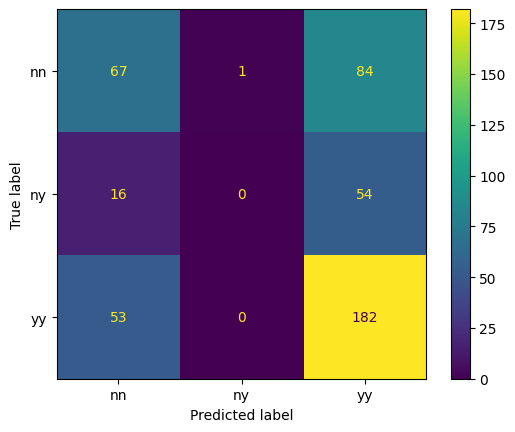

In [63]:
conf_matrix = confusion_matrix(y_kakadu_test_enc, preds_kakadu)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=label_kakadu.classes_).plot()

## Моделирование

### Задание 2.1

Работа с датасетом "Number of Equations and Citations for Evolutionary Biology Publications".

**Датасет:** EquationCitations.csv (документация: https://vincentarelbundock.github.io/Rdatasets/doc/AER/EquationCitations.html)

**Основное задание:** предобработка датасета и моделирование зависимостей.


*   Ваши независимые переменные: 'startpage', 'pages', 'equations', 'mainequations', 'appequations'. Ваша зависимая переменная - othercites.
*   Разделите датасет на тренировочную и тестовую выборки;
*   Шкалируйте независимые переменные.
*   Смоделируйте зависимость количества "чужих" цитат (т.е. цитат, не являющихся самоцитированиями) от стартовой страницы, количества страниц, общего количества формул, количества формул в теле текста и количества формул в предложениях.

In [67]:
df = pd.read_csv("EquationCitations.csv")

df.head()

,rownames,journal,authors,volume,startpage,pages,equations,mainequations,appequations,cites,selfcites,othercites,theocites,nontheocites
0,1,AmNat,Prodohl et al.,151,7,13,0,0,0,37,4,33,8,22
1,2,AmNat,Mauricio,151,20,9,2,2,0,178,5,173,19,150
2,3,AmNat,Thrall et al.,151,29,17,15,15,0,25,10,15,8,6
3,4,AmNat,Watson et al.,151,46,13,7,7,0,127,11,116,17,98
4,5,AmNat,Klein & Nelson,151,59,9,0,0,0,43,8,35,5,28


1. Разделите датасет на тренировочную и тестовую выборки

In [81]:
x_quote = df[['startpage', 'pages', 'equations', 'mainequations', 'appequations']]
y_quote = df["othercites"].tolist()

In [82]:
X_quote_train, X_quote_test, y_quote_train, y_quote_test = train_test_split(x_quote,
                                                                            y_quote,
                                                                            test_size=0.2)

2. Шкалируйте независимые переменные

In [83]:
scaler = MinMaxScaler()

scaler.fit(X_quote_train)

MinMaxScaler()

In [84]:
x_train_scaled = scaler.transform(X_quote_train)
x_test_scaled = scaler.transform(X_quote_test)

In [85]:
x_train_scaled

array([[0.51678952, 0.2173913 , 0.        , 0.        , 0.        ],
       [0.12612613, 0.2173913 , 0.28235294, 0.24657534, 0.1875    ],
       [0.35790336, 0.47826087, 0.09411765, 0.10958904, 0.        ],
       ...,
       [0.61670762, 0.2173913 , 0.03529412, 0.04109589, 0.        ],
       [0.52252252, 0.26086957, 0.31764706, 0.2739726 , 0.21875   ],
       [0.30958231, 0.13043478, 0.01176471, 0.01369863, 0.        ]])

3. Смоделируйте зависимость количества "чужих" цитат (т.е. цитат, не являющихся самоцитированиями) от стартовой страницы, количества страниц, общего количества формул, количества формул в теле текста и количества формул в предложениях

In [77]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression

In [86]:
def get_scores(y_test, y_pred):
    print('R^2: %.2f' % r2_score(y_test, y_pred))
    print('MSE: %.2f' % mean_squared_error(y_test, y_pred))
    print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))

linreg = LinearRegression()

linreg.fit(x_train_scaled, y_quote_train)

lin_preds_eq = linreg.predict(x_test_scaled)

get_scores(y_quote_test, lin_preds_eq)

R^2: 0.04
MSE: 2059.52
MAE: 28.32


In [87]:
ridge = Ridge()

ridge.fit(x_train_scaled, y_quote_train)
ridge_preds_eq = ridge.predict(x_test_scaled)
get_scores(y_quote_test, ridge_preds_eq)

R^2: 0.04
MSE: 2061.94
MAE: 28.34


In [88]:
from sklearn.preprocessing import PolynomialFeatures

In [89]:
polynomial = PolynomialFeatures(3)

polynomial.fit(x_train_scaled)
# @title
X_eq_train_poly = polynomial.transform(x_train_scaled)
X_eq_test_poly = polynomial.transform(x_test_scaled)

In [90]:
models = {'linreg': LinearRegression(), 'lasso': Lasso(), 'ridge': Ridge()}

for k, v in models.items():
    print(k)
    v.fit(X_eq_train_poly, y_quote_train)
    preds = v.predict(X_eq_test_poly)
    get_scores(y_quote_test, preds)

linreg
R^2: 0.01
MSE: 2113.67
MAE: 29.33
lasso
R^2: 0.01
MSE: 2113.20
MAE: 29.66
ridge
R^2: 0.05
MSE: 2029.70
MAE: 27.99


### Задание 2.2

Работа с укороченной версией датасета "Amazon reviews on Women dresses".

**Датасет:** dresses_sample.csv (документация: https://www.kaggle.com/datasets/surajjha101/myntra-reviews-on-women-dresses-comprehensive)

**Основное задание** предобработайте датасет и предскажите, о каком предмете одежды (department_name) идет речь, ориентируясь на текст ревью.

*   Оставьте следующие колонки: department_name, review_text;
*   Разделите датасет на тренировочную и тестовую выборки;
*   Векторизуйте тексты ревью;
*   Закодируйте переменную department_name;
*   Постройте модель для определения предмета одежды, о котором идет речь, по тексту ревью;
*   Постройте ConfusionMatrix и оцените качество модели.


In [94]:
df = pd.read_csv('dresses_sample.csv')

df.head(2)

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,7780,54,General Petite,Dresses,Dresses,1095,Petal perfect!,Lovely statement shift. sweet and sophisticate...,4,5,1
1,14653,26,General,Dresses,Dresses,1078,Buy it!,This dress is amazing! ordered one with a disc...,0,5,1


1. Оставьте следующие колонки: department_name, review_text. Разделите датасет на тренировочную и тестовую выборки

In [95]:
X_train, X_test, y_train, y_test = train_test_split(df['review_text'],
                                                    df['department_name'].tolist(),
                                                    stratify=df['department_name'])

2. Векторизуйте тексты ревью

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [97]:
tfidf = TfidfVectorizer()
tfidf.fit(X_train)
X_train_dresses_vec = tfidf.transform(X_train)
X_test_dresses_vec = tfidf.transform(X_test)

3. Закодируйте переменную department_name

In [98]:
le_dresses = LabelEncoder()

le_dresses.fit(y_train)
y_train_dresses_enc = le_dresses.transform(y_train)
y_test_dresses_enc = le_dresses.transform(y_test)

4. Постройте модель для определения предмета одежды, о котором идет речь, по тексту ревью

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
log = LogisticRegression(random_state=42, multi_class='ovr', class_weight='balanced')

log.fit(X_train_dresses_vec, y_train_dresses_enc)

dresses_pred = log.predict(X_test_dresses_vec)

print(classification_report(y_test_dresses_enc,
                            dresses_pred,
                            target_names=le_dresses.classes_))

              precision    recall  f1-score   support

     Bottoms       0.87      0.89      0.88       457
     Dresses       0.92      0.87      0.89       780
     Jackets       0.58      0.62      0.60       115
        Tops       0.89      0.91      0.90      1256
       Trend       0.00      0.00      0.00        14

    accuracy                           0.88      2622
   macro avg       0.65      0.66      0.65      2622
weighted avg       0.87      0.88      0.88      2622



5. Постройте ConfusionMatrix и оцените качество модели

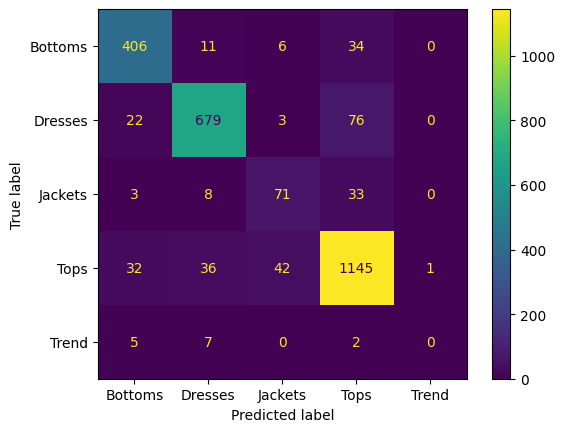

In [101]:
matrix = confusion_matrix(y_test_dresses_enc, dresses_pred)
display = ConfusionMatrixDisplay(matrix, display_labels=le_dresses.classes_).plot()

## Кросс-валидация и подбор параметров

### Задание 3

Проведите кросс-валидацию на материале задания 2.2. Воспользуйтесь функцией cross_validate. Затем используйте GridSearchCV для подбора параметров. Например, подберите лучший C-параметр логистической регрессии из следующих значений: [0.5, 1, 2].

In [106]:
from sklearn.model_selection import cross_validate

from sklearn.model_selection import GridSearchCV

In [ ]:
logreg = LogisticRegression(random_state=42, multi_class='ovr', class_weight='balanced')
scoring = {
           'f1': 'f1_weighted',
           'precision': 'precision_weighted',
           'recall': 'recall_weighted'
           }

scores = cross_validate(logreg,
                        X_train_dresses_vec,
                        y_train_dresses_enc,
                        scoring=scoring,
                        cv=5,
                        return_estimator=True,
                        return_train_score=True,
                        )

In [104]:
df_scores = pd.DataFrame.from_dict(scores)

df_scores

,fit_time,score_time,estimator,test_f1,train_f1,test_precision,train_precision,test_recall,train_recall
0,0.949928,0.012781,"LogisticRegression(class_weight='balanced', mu...",0.877014,0.942705,0.875666,0.944327,0.879288,0.942308
1,0.901102,0.025582,"LogisticRegression(class_weight='balanced', mu...",0.875622,0.940881,0.875256,0.942274,0.877305,0.940569
2,0.632229,0.012681,"LogisticRegression(class_weight='balanced', mu...",0.871117,0.942382,0.869152,0.944086,0.874126,0.941999
3,0.795743,0.011971,"LogisticRegression(class_weight='balanced', mu...",0.881903,0.940336,0.879484,0.942114,0.884933,0.939933
4,0.967838,0.011748,"LogisticRegression(class_weight='balanced', mu...",0.869596,0.945021,0.871279,0.946523,0.869676,0.944700


In [105]:
grid = {'C': [0.5, 1, 2]}

{'C': [0.5, 1, 2]}

In [107]:
logreg_gs = LogisticRegression(random_state=42, multi_class='ovr', class_weight='balanced')
search = GridSearchCV(logreg_gs, grid, n_jobs=2, cv=5, scoring='f1_weighted', return_train_score=True, verbose=1)
search.fit(X_train_dresses_vec, y_train_dresses_enc)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          multi_class='ovr', random_state=42),
             n_jobs=2, param_grid={'C': [0.5, 1, 2]}, return_train_score=True,
             scoring='f1_weighted', verbose=1)

In [108]:
gs_results = pd.DataFrame(search.cv_results_)

gs_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.659472,0.030001,0.004725,0.000215,0.5,{'C': 0.5},0.875326,0.874526,0.869263,0.877564,...,0.872914,0.003705,3,0.925660,0.926284,0.927314,0.924441,0.927431,0.926226,0.001109
1,1.003295,0.284358,0.005909,0.001193,1,{'C': 1},0.877014,0.875622,0.871117,0.881903,...,0.875050,0.004390,2,0.942705,0.940881,0.942382,0.940336,0.945021,0.942265,0.001639
2,1.088297,0.308019,0.004920,0.001722,2,{'C': 2},0.878626,0.877346,0.870876,0.882846,...,0.876590,0.004186,1,0.957842,0.956413,0.957521,0.955791,0.957696,0.957053,0.000807


In [109]:
gs_preds = search.predict(X_test_dresses_vec)

print(classification_report(y_test_dresses_enc,
                            gs_preds,
                            target_names=le_dresses.classes_))



              precision    recall  f1-score   support

     Bottoms       0.86      0.91      0.88       457
     Dresses       0.91      0.88      0.90       780
     Jackets       0.59      0.61      0.60       115
        Tops       0.90      0.91      0.91      1256
       Trend       0.00      0.00      0.00        14

    accuracy                           0.88      2622
   macro avg       0.65      0.66      0.66      2622
weighted avg       0.88      0.88      0.88      2622



In [110]:
search.best_params_


{'C': 2}